# NLP - Assignment
# Flirt Prediction Model

### Import relevent libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

## Data Collection

In [2]:
raw_data = pd.read_csv('Poorna Chat.txt', header=None, on_bad_lines='warn', encoding = 'utf8')

In [3]:
raw_data

,0,1
0,12/7/16,11:46 PM - Poooor: Hello!
1,12/7/16,11:46 PM - Poooor: <Media omitted>
2,12/7/16,11:47 PM - Priya Manikandan😘: Who's dis
3,12/7/16,11:47 PM - Poooor: 👌🏻👌🏻👌🏻👌🏻
4,12/7/16,11:48 PM - Priya Manikandan😘: Lost all my con...
...,...,...
5749,12/4/24,10:00 PM - Poooor: My Mind is only with appa
5750,12/4/24,10:00 PM - Poooor: Pack panave thonala
5751,12/4/24,10:00 PM - Poooor: What to speak with him how...
5752,12/4/24,10:18 PM - Priya Manikandan😘: Ne porardhe ava...


## Data Preprocessing

In [4]:
data = raw_data

In [5]:
data.columns = ['Date','Chat']
data

,Date,Chat
0,12/7/16,11:46 PM - Poooor: Hello!
1,12/7/16,11:46 PM - Poooor: <Media omitted>
2,12/7/16,11:47 PM - Priya Manikandan😘: Who's dis
3,12/7/16,11:47 PM - Poooor: 👌🏻👌🏻👌🏻👌🏻
4,12/7/16,11:48 PM - Priya Manikandan😘: Lost all my con...
...,...,...
5749,12/4/24,10:00 PM - Poooor: My Mind is only with appa
5750,12/4/24,10:00 PM - Poooor: Pack panave thonala
5751,12/4/24,10:00 PM - Poooor: What to speak with him how...
5752,12/4/24,10:18 PM - Priya Manikandan😘: Ne porardhe ava...


In [6]:
Mess = data['Chat'].str.split('-',n=1,expand=True)
Mess.columns = ['Time','Chat']
data['Time'] = Mess['Time']
data

,Date,Chat,Time
0,12/7/16,11:46 PM - Poooor: Hello!,11:46 PM
1,12/7/16,11:46 PM - Poooor: <Media omitted>,11:46 PM
2,12/7/16,11:47 PM - Priya Manikandan😘: Who's dis,11:47 PM
3,12/7/16,11:47 PM - Poooor: 👌🏻👌🏻👌🏻👌🏻,11:47 PM
4,12/7/16,11:48 PM - Priya Manikandan😘: Lost all my con...,11:48 PM
...,...,...,...
5749,12/4/24,10:00 PM - Poooor: My Mind is only with appa,10:00 PM
5750,12/4/24,10:00 PM - Poooor: Pack panave thonala,10:00 PM
5751,12/4/24,10:00 PM - Poooor: What to speak with him how...,10:00 PM
5752,12/4/24,10:18 PM - Priya Manikandan😘: Ne porardhe ava...,10:18 PM


In [7]:
Mess1 = Mess['Chat'].str.split(':',n=1,expand=True)
Mess1.columns = ['Name', 'Chats']
data['Name'] = Mess1['Name']
data['Message'] = Mess1['Chats']

In [8]:
data

,Date,Chat,Time,Name,Message
0,12/7/16,11:46 PM - Poooor: Hello!,11:46 PM,Poooor,Hello!
1,12/7/16,11:46 PM - Poooor: <Media omitted>,11:46 PM,Poooor,<Media omitted>
2,12/7/16,11:47 PM - Priya Manikandan😘: Who's dis,11:47 PM,Priya Manikandan😘,Who's dis
3,12/7/16,11:47 PM - Poooor: 👌🏻👌🏻👌🏻👌🏻,11:47 PM,Poooor,👌🏻👌🏻👌🏻👌🏻
4,12/7/16,11:48 PM - Priya Manikandan😘: Lost all my con...,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back
...,...,...,...,...,...
5749,12/4/24,10:00 PM - Poooor: My Mind is only with appa,10:00 PM,Poooor,My Mind is only with appa
5750,12/4/24,10:00 PM - Poooor: Pack panave thonala,10:00 PM,Poooor,Pack panave thonala
5751,12/4/24,10:00 PM - Poooor: What to speak with him how...,10:00 PM,Poooor,What to speak with him how to console him nu ...
5752,12/4/24,10:18 PM - Priya Manikandan😘: Ne porardhe ava...,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah...


In [9]:
data.drop('Chat', axis=1, inplace=True)

In [10]:
data

,Date,Time,Name,Message
0,12/7/16,11:46 PM,Poooor,Hello!
1,12/7/16,11:46 PM,Poooor,<Media omitted>
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis
3,12/7/16,11:47 PM,Poooor,👌🏻👌🏻👌🏻👌🏻
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back
...,...,...,...,...
5749,12/4/24,10:00 PM,Poooor,My Mind is only with appa
5750,12/4/24,10:00 PM,Poooor,Pack panave thonala
5751,12/4/24,10:00 PM,Poooor,What to speak with him how to console him nu ...
5752,12/4/24,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah...


### Remove Emojis

In [11]:
# pip install emoji

In [12]:
df = data

In [13]:
# Function to remove emojis and unwanted Unicode characters
import re
def clean_text(text):
    if not isinstance(text, str):  # Check if the value is not a string
        return ''  # Return an empty string 
    # Remove emojis (pattern covers most emojis)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    
    # Remove unwanted Unicode characters (non-ASCII)
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+!@', '', text)  # Remove non-ASCII characters
    
    return text.strip()

In [14]:
# Apply the function to the 'messages' column
df['cleaned_messages'] = df['Message'].apply(clean_text)
df

,Date,Time,Name,Message,cleaned_messages
0,12/7/16,11:46 PM,Poooor,Hello!,Hello!
1,12/7/16,11:46 PM,Poooor,<Media omitted>,<Media omitted>
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis,Who's dis
3,12/7/16,11:47 PM,Poooor,👌🏻👌🏻👌🏻👌🏻,
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back,Lost all my contacts few weeks back
...,...,...,...,...,...
5749,12/4/24,10:00 PM,Poooor,My Mind is only with appa,My Mind is only with appa
5750,12/4/24,10:00 PM,Poooor,Pack panave thonala,Pack panave thonala
5751,12/4/24,10:00 PM,Poooor,What to speak with him how to console him nu ...,What to speak with him how to console him nu y...
5752,12/4/24,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah...,Ne porardhe avarku oru periya mind changer ah ...


In [15]:
df.drop('Message',axis=1,inplace=True)

In [16]:
df

,Date,Time,Name,cleaned_messages
0,12/7/16,11:46 PM,Poooor,Hello!
1,12/7/16,11:46 PM,Poooor,<Media omitted>
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis
3,12/7/16,11:47 PM,Poooor,
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back
...,...,...,...,...
5749,12/4/24,10:00 PM,Poooor,My Mind is only with appa
5750,12/4/24,10:00 PM,Poooor,Pack panave thonala
5751,12/4/24,10:00 PM,Poooor,What to speak with him how to console him nu y...
5752,12/4/24,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah ...


In [17]:
df.dropna(inplace=True)

In [18]:
df

,Date,Time,Name,cleaned_messages
0,12/7/16,11:46 PM,Poooor,Hello!
1,12/7/16,11:46 PM,Poooor,<Media omitted>
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis
3,12/7/16,11:47 PM,Poooor,
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back
...,...,...,...,...
5749,12/4/24,10:00 PM,Poooor,My Mind is only with appa
5750,12/4/24,10:00 PM,Poooor,Pack panave thonala
5751,12/4/24,10:00 PM,Poooor,What to speak with him how to console him nu y...
5752,12/4/24,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah ...


## Sentiment Analysis

### Identifing Message Type - Flirt / Non Flirt

In [19]:
def SentimentalAnalysis(data,columnname):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    df['Scores'] = df[columnname].apply(lambda message: sia.polarity_scores(message))
    df['Compound'] = df['Scores'].apply(lambda pol_score: pol_score['compound'])
    df['Positive'] = df['Scores'].apply(lambda pol_score : pol_score['pos'])
    df['Negative'] = df['Scores'].apply(lambda pol_score: pol_score['neg'])
    df['Neutral'] = df['Scores'].apply(lambda pol_score: pol_score['neu'])
    
    df['MessageType'] = df['Compound'].apply(lambda fb: 'Flirt' if fb>0.5 else 'Non-Flirt')
    
    Message_type = df['MessageType'].value_counts()
    
    return data,Message_type

In [20]:
data,Message_type = SentimentalAnalysis(df,columnname = 'cleaned_messages')

In [21]:
df

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType
0,12/7/16,11:46 PM,Poooor,Hello!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
1,12/7/16,11:46 PM,Poooor,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
3,12/7/16,11:47 PM,Poooor,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,0.000,Non-Flirt
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.000,0.277,0.723,Non-Flirt
...,...,...,...,...,...,...,...,...,...,...
5749,12/4/24,10:00 PM,Poooor,My Mind is only with appa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
5750,12/4/24,10:00 PM,Poooor,Pack panave thonala,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
5751,12/4/24,10:00 PM,Poooor,What to speak with him how to console him nu y...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Non-Flirt
5752,12/4/24,10:18 PM,Priya Manikandan😘,Ne porardhe avarku oru periya mind changer ah ...,"{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",0.7096,0.269,0.000,0.731,Flirt


### Seperating the feature & Label for model selection

In [22]:
dataset = df[['cleaned_messages','MessageType']]
dataset

,cleaned_messages,MessageType
0,Hello!,Non-Flirt
1,<Media omitted>,Non-Flirt
2,Who's dis,Non-Flirt
3,,Non-Flirt
4,Lost all my contacts few weeks back,Non-Flirt
...,...,...
5749,My Mind is only with appa,Non-Flirt
5750,Pack panave thonala,Non-Flirt
5751,What to speak with him how to console him nu y...,Non-Flirt
5752,Ne porardhe avarku oru periya mind changer ah ...,Flirt


In [23]:
dataset.to_csv('FlirtPredictiondata.csv',index=False)

In [24]:
dataset = pd.read_csv('FlirtPredictiondata.csv',index_col=False)
dataset

,cleaned_messages,MessageType
0,Hello!,Non-Flirt
1,<Media omitted>,Non-Flirt
2,Who's dis,Non-Flirt
3,NaN,Non-Flirt
4,Lost all my contacts few weeks back,Non-Flirt
...,...,...
5482,My Mind is only with appa,Non-Flirt
5483,Pack panave thonala,Non-Flirt
5484,What to speak with him how to console him nu y...,Non-Flirt
5485,Ne porardhe avarku oru periya mind changer ah ...,Flirt


In [25]:
dataset.shape

(5487, 2)

In [26]:
dataset.dropna()

,cleaned_messages,MessageType
0,Hello!,Non-Flirt
1,<Media omitted>,Non-Flirt
2,Who's dis,Non-Flirt
4,Lost all my contacts few weeks back,Non-Flirt
5,Yur name ?,Non-Flirt
...,...,...
5482,My Mind is only with appa,Non-Flirt
5483,Pack panave thonala,Non-Flirt
5484,What to speak with him how to console him nu y...,Non-Flirt
5485,Ne porardhe avarku oru periya mind changer ah ...,Flirt


In [27]:
dataset.isnull().sum()

cleaned_messages    269
MessageType           0
dtype: int64

In [28]:
dataset= dataset.fillna('')

In [29]:
dataset.isnull().sum()

cleaned_messages    0
MessageType         0
dtype: int64

In [30]:
dataset.shape

(5487, 2)

In [31]:
indep_x = dataset['cleaned_messages']
dep_y = dataset['MessageType']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(indep_x,dep_y,test_size = 0.20,random_state=42)

## Model Creation 

## Counter Vector with Classification Algorithms

In [33]:
countV = CountVectorizer(stop_words='english')
vectors_train = countV.fit_transform(x_train)
vectors_test = countV.transform(x_test)

In [34]:
vectors_train.shape

(4389, 4291)

In [35]:
vectors_test.shape

(1098, 4291)

In [36]:
print(vectors_train)

  (0, 217)	1
  (0, 833)	1
  (0, 1022)	1
  (0, 3089)	1
  (0, 2635)	1
  (0, 1120)	1
  (0, 1487)	1
  (0, 2423)	1
  (0, 1461)	1
  (1, 3486)	1
  (1, 3188)	1
  (2, 246)	1
  (3, 2262)	1
  (3, 3140)	1
  (3, 2775)	1
  (3, 2962)	1
  (3, 1585)	1
  (3, 740)	1
  (3, 1489)	1
  (3, 2948)	1
  (4, 3486)	1
  (4, 3188)	1
  (4, 4137)	1
  (4, 2297)	1
  (5, 1086)	1
  :	:
  (4375, 2957)	1
  (4376, 3763)	1
  (4376, 2398)	1
  (4377, 833)	1
  (4377, 544)	1
  (4378, 1803)	1
  (4378, 1438)	1
  (4378, 2687)	1
  (4379, 660)	1
  (4379, 2548)	1
  (4379, 1725)	1
  (4379, 4196)	1
  (4379, 3326)	1
  (4380, 3284)	1
  (4380, 2406)	1
  (4381, 4151)	1
  (4382, 2322)	1
  (4382, 2305)	1
  (4382, 1787)	1
  (4383, 1284)	1
  (4384, 824)	1
  (4385, 1318)	1
  (4387, 2075)	1
  (4387, 2419)	1
  (4388, 155)	1


In [37]:
print(vectors_test)

  (0, 796)	1
  (0, 1580)	1
  (0, 1897)	1
  (0, 2855)	1
  (0, 2942)	1
  (1, 198)	1
  (3, 2406)	2
  (4, 2199)	1
  (4, 2494)	1
  (4, 2668)	1
  (4, 3278)	1
  (5, 2075)	1
  (5, 2419)	1
  (6, 1)	1
  (6, 271)	2
  (6, 803)	1
  (6, 1803)	1
  (6, 4003)	1
  (6, 4224)	1
  (7, 4242)	1
  (8, 102)	1
  (8, 122)	1
  (9, 2245)	1
  (9, 3906)	1
  (9, 4043)	1
  :	:
  (1089, 1489)	1
  (1089, 2916)	1
  (1089, 3791)	1
  (1090, 187)	1
  (1090, 802)	1
  (1090, 854)	1
  (1090, 2199)	1
  (1090, 3251)	1
  (1091, 2199)	1
  (1091, 2234)	1
  (1091, 3140)	1
  (1091, 3782)	1
  (1092, 2299)	1
  (1092, 2784)	1
  (1092, 3168)	1
  (1092, 4079)	1
  (1093, 271)	1
  (1093, 1281)	1
  (1093, 2821)	1
  (1093, 2953)	1
  (1094, 1242)	2
  (1095, 4240)	1
  (1096, 710)	1
  (1096, 2082)	1
  (1096, 3229)	1


### Logistic Regression

In [38]:
classifier = LogisticRegression()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9699453551912568

### KNN

In [39]:
classifier = KNeighborsClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9581056466302368

### Multinomial

In [40]:
classifier = MultinomialNB()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9508196721311475

### SVM

In [41]:
classifier = SVC()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9681238615664846

### Decision Tree

In [42]:
classifier = DecisionTreeClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9817850637522769

### Random Forest

In [43]:
classifier = RandomForestClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9772313296903461

### Passive Aggressive

In [44]:
classifier = PassiveAggressiveClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.970856102003643

## In CountVector & Classification Algorithms --> 'Decision Tree Classifier' performs with maximum Accuracy = 98%

### In Function --> CountVector & Classification Combinations

In [45]:
model_dict = { 'logistic' : LogisticRegression(),
               'knn' : KNeighborsClassifier(),
               'MultinomialNB' : MultinomialNB(),
               'svm' : SVC(),
               'DecisionTree'  : DecisionTreeClassifier(),
               'RandomForest'  : RandomForestClassifier(),
               'PassiveAggressive' : PassiveAggressiveClassifier()
             }
results ={}

def Model_Creation(model,vectors_train,y_train,vectors_test,y_test):
    for name, model in model.items():
        model.fit(vectors_train,y_train)
        y_pred = classifier.predict(vectors_test)
        accuracy = accuracy_score(y_test,y_pred)
        results[name] = accuracy
        print(f'{name}: Accuracy =  {accuracy:.2f}')
    return results

In [46]:
results = Model_Creation(model_dict,vectors_train,y_train,vectors_test,y_test)

logistic: Accuracy =  0.97
knn: Accuracy =  0.97
MultinomialNB: Accuracy =  0.97
svm: Accuracy =  0.97
DecisionTree: Accuracy =  0.97
RandomForest: Accuracy =  0.97
PassiveAggressive: Accuracy =  0.97


## TF-IDF Vector with Classification Algorithms

In [47]:
tfidf = TfidfVectorizer(stop_words='english')
vectors_train = tfidf.fit_transform(x_train)
vectors_test = tfidf.transform(x_test)

### Logistic Regression

In [48]:
classifier = LogisticRegression()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9489981785063752

### KNN

In [49]:
classifier = KNeighborsClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9553734061930783

### Multinomial

In [50]:
classifier = MultinomialNB()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9398907103825137

### SVM

In [51]:
classifier = SVC()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9608378870673953

### Decision Tree

In [52]:
classifier = DecisionTreeClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9690346083788707

### Random Forest

In [53]:
classifier = RandomForestClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9681238615664846

### Passive Aggressive

In [54]:
classifier = PassiveAggressiveClassifier()
classifier.fit(vectors_train,y_train)
y_pred = classifier.predict(vectors_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9644808743169399

## In TF-IDF Vector & Classification Algorithms -->  ' Almost all ' performs well with maximum Accuracy = 96%

## Final Model
## CountVector & Classification Algorithms --> 'Decision Tree Classifier' with 97% of Accuracy

### In Function --> TF IDF Vector & Classification Combinations

In [55]:
model_dict = { 'logistic' : LogisticRegression(),
               'knn' : KNeighborsClassifier(),
               'MultinomialNB' : MultinomialNB(),
               'svm' : SVC(),
               'DecisionTree'  : DecisionTreeClassifier(),
               'RandomForest'  : RandomForestClassifier(),
               'PassiveAggressive' : PassiveAggressiveClassifier()
             }
results ={}

def Model_Creation(model,vectors_train,y_train,vectors_test,y_test):
    for name, model in model.items():
        model.fit(vectors_train,y_train)
        y_pred = classifier.predict(vectors_test)
        accuracy = accuracy_score(y_test,y_pred)
        results[name] = accuracy
        print(f'{name}: Accuracy =  {accuracy:.2f}')
    return results

In [56]:
results = Model_Creation(model_dict,vectors_train,y_train,vectors_test,y_test)

logistic: Accuracy =  0.96
knn: Accuracy =  0.96
MultinomialNB: Accuracy =  0.96
svm: Accuracy =  0.96
DecisionTree: Accuracy =  0.96
RandomForest: Accuracy =  0.96
PassiveAggressive: Accuracy =  0.96


### Flirt & Non Flirt Messages count

In [57]:
Message_type

MessageType
Non-Flirt    5194
Flirt         293
Name: count, dtype: int64

### Talkative & Less Talkative

In [58]:
Most_Talkative = df['Name'].value_counts().max()
Most_Talkative_name = df['Name'].value_counts().idxmax()
Less_Talkative = df['Name'].value_counts().min()
Less_Talkative_name = df['Name'].value_counts().idxmin()

In [59]:
print(Most_Talkative_name)
Most_Talkative

 Poooor


2912

In [60]:
print(Less_Talkative_name)
Less_Talkative

 Priya Manikandan😘


2575

In [61]:
talkative_df = pd.DataFrame({'Index':['Most Talkative','Less Talkative'],
                            'Name': [Most_Talkative_name,Less_Talkative_name],
                            'Message_count': [Most_Talkative,Less_Talkative]})

In [62]:
talkative_df

,Index,Name,Message_count
0,Most Talkative,Poooor,2912
1,Less Talkative,Priya Manikandan😘,2575


### Most Active Day 

In [63]:
df['TimeStamp'] = pd.to_datetime(df['Date'] + df['Time'])

In [64]:
df['TimeStamp']

0      2016-12-07 23:46:00
1      2016-12-07 23:46:00
2      2016-12-07 23:47:00
3      2016-12-07 23:47:00
4      2016-12-07 23:48:00
               ...        
5749   2024-12-04 22:00:00
5750   2024-12-04 22:00:00
5751   2024-12-04 22:00:00
5752   2024-12-04 22:18:00
5753   2024-12-04 23:49:00
Name: TimeStamp, Length: 5487, dtype: datetime64[ns]

In [65]:
df.head()

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType,TimeStamp
0,12/7/16,11:46 PM,Poooor,Hello!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00
1,12/7/16,11:46 PM,Poooor,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:47:00
3,12/7/16,11:47 PM,Poooor,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000,Non-Flirt,2016-12-07 23:47:00
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.0,0.277,0.723,Non-Flirt,2016-12-07 23:48:00


In [66]:
df['Day'] = df['TimeStamp'].dt.day_name()

In [67]:
df['Hour'] = df['TimeStamp'].dt.hour

In [68]:
df.head()

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType,TimeStamp,Day,Hour
0,12/7/16,11:46 PM,Poooor,Hello!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00,Wednesday,23
1,12/7/16,11:46 PM,Poooor,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00,Wednesday,23
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:47:00,Wednesday,23
3,12/7/16,11:47 PM,Poooor,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000,Non-Flirt,2016-12-07 23:47:00,Wednesday,23
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.0,0.277,0.723,Non-Flirt,2016-12-07 23:48:00,Wednesday,23


In [69]:
most_active_day = df['Day'].value_counts().idxmax()
most_active_day_count = df['Day'].value_counts().max()

In [70]:
most_active_day

'Tuesday'

In [71]:
most_active_day_count

963

In [72]:
MostActiveDay = pd.DataFrame({'Index': ['Most Active Day'],
                              'Day': most_active_day,
                               'Count' : most_active_day_count})

In [73]:
MostActiveDay

,Index,Day,Count
0,Most Active Day,Tuesday,963


### Most Active Time

In [74]:
most_active_time = df['Hour'].value_counts().idxmax()
most_active_time_count = df['Hour'].value_counts().max()

In [75]:
MostActiveTime = pd.DataFrame({'Index': ['Most Active Time'],
                              'Hour': most_active_time,
                              'Count' : most_active_time_count})

In [76]:
MostActiveTime

,Index,Hour,Count
0,Most Active Time,6,505


In [77]:
df.head()

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType,TimeStamp,Day,Hour
0,12/7/16,11:46 PM,Poooor,Hello!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00,Wednesday,23
1,12/7/16,11:46 PM,Poooor,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:46:00,Wednesday,23
2,12/7/16,11:47 PM,Priya Manikandan😘,Who's dis,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,Non-Flirt,2016-12-07 23:47:00,Wednesday,23
3,12/7/16,11:47 PM,Poooor,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000,Non-Flirt,2016-12-07 23:47:00,Wednesday,23
4,12/7/16,11:48 PM,Priya Manikandan😘,Lost all my contacts few weeks back,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.0,0.277,0.723,Non-Flirt,2016-12-07 23:48:00,Wednesday,23


In [139]:
media = df['cleaned_messages'] == '<Media omitted>'

In [140]:
media.value_counts()

cleaned_messages
False    5142
True      345
Name: count, dtype: int64

In [144]:
Media_df = df[(df['Name'].notnull()) & (df['cleaned_messages'] == '<Media omitted>')]
Media_df.head()

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType,TimeStamp,Day,Hour
1,12/7/16,11:46 PM,Poooor,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,Non-Flirt,2016-12-07 23:46:00,Wednesday,23
100,1/26/17,1:07 PM,Priya Manikandan😘,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,Non-Flirt,2017-01-26 13:07:00,Thursday,13
119,3/18/17,2:00 PM,Priya Manikandan😘,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,Non-Flirt,2017-03-18 14:00:00,Saturday,14
120,3/18/17,2:00 PM,Priya Manikandan😘,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,Non-Flirt,2017-03-18 14:00:00,Saturday,14
121,3/18/17,2:00 PM,Priya Manikandan😘,<Media omitted>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,Non-Flirt,2017-03-18 14:00:00,Saturday,14


<Axes: xlabel='cleaned_messages', ylabel='count'>

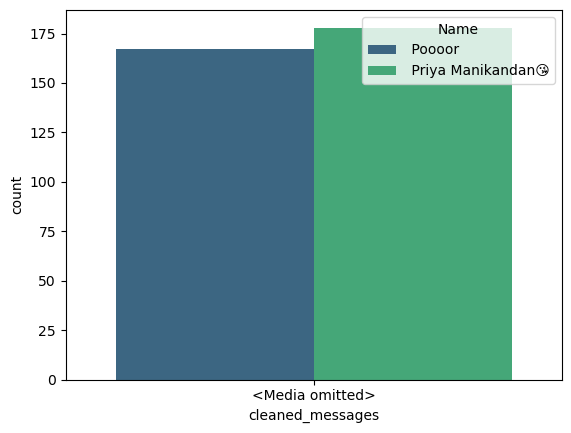

In [142]:
sb.countplot(data=Media_df, x = 'cleaned_messages', hue = 'Name', palette = 'viridis')

### Missed Call Count

In [160]:
missed_call = df['cleaned_messages'] == 'Missed voice call'
print('Missed Call Count : ', missed_call.sum())

Missed Call Count :  9


In [158]:
missed_call_df = df[(df['Name'].notnull()) & (df['cleaned_messages'] == 'Missed voice call')]
missed_call_df

,Date,Time,Name,cleaned_messages,Scores,Compound,Positive,Negative,Neutral,MessageType,TimeStamp,Day,Hour
143,4/3/17,4:51 AM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2017-04-03 04:51:00,Monday,4
4040,10/15/22,2:51 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2022-10-15 14:51:00,Saturday,14
4981,4/16/23,10:23 AM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-04-16 10:23:00,Sunday,10
5006,5/1/23,4:56 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-05-01 16:56:00,Monday,16
5107,6/12/23,6:04 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-06-12 18:04:00,Monday,18
5142,6/19/23,1:58 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-06-19 13:58:00,Monday,13
5147,6/23/23,12:26 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-06-23 12:26:00,Friday,12
5176,9/1/23,7:27 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-09-01 19:27:00,Friday,19
5213,9/30/23,1:35 PM,Poooor,Missed voice call,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",-0.296,0.0,0.524,0.476,Non-Flirt,2023-09-30 13:35:00,Saturday,13


## Visualization 

<Axes: xlabel='Compound'>

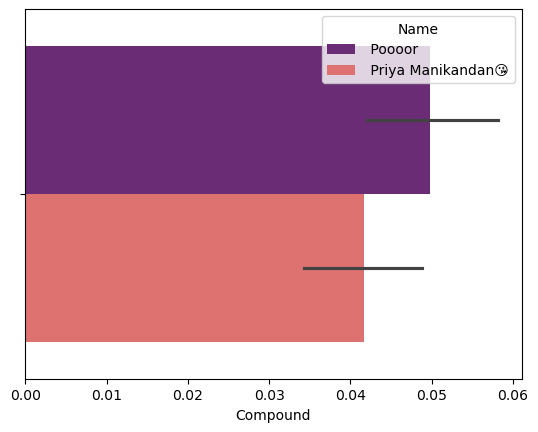

In [82]:
sb.barplot(data=df, x = 'Compound', hue = 'Name', palette = 'magma' )

<Axes: xlabel='Day', ylabel='count'>

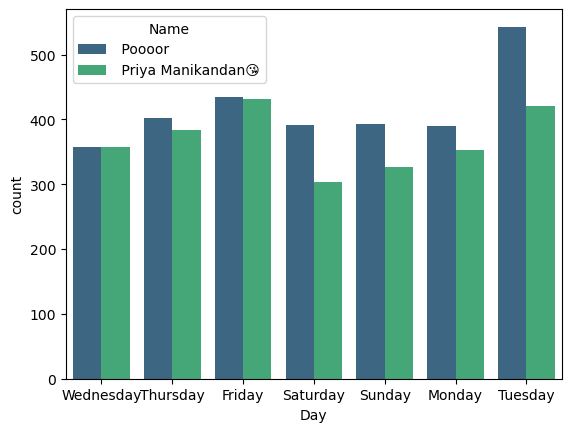

In [81]:
sb.countplot(data=df, x = 'Day', hue = 'Name', palette = 'viridis' )

<Axes: xlabel='MessageType', ylabel='count'>

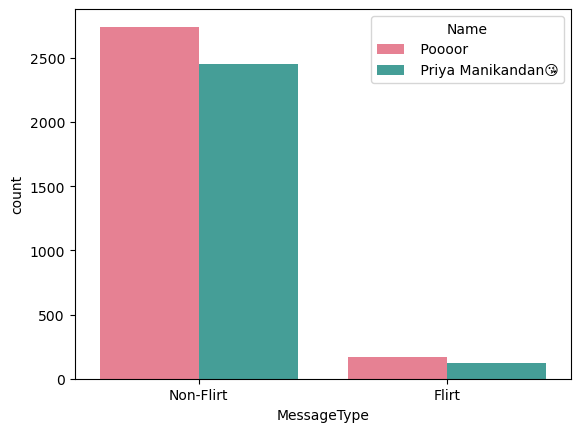

In [90]:
sb.countplot(data=df, x = 'MessageType', hue = 'Name', palette = 'husl' )

<Axes: xlabel='Positive', ylabel='Negative'>

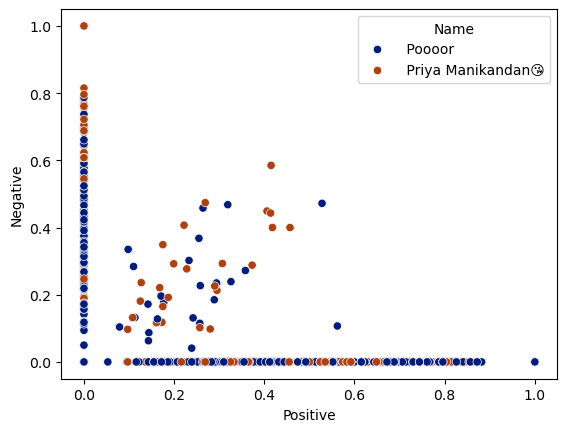

In [92]:
sb.scatterplot(data=df, x = 'Positive', y = 'Negative', hue = 'Name', palette = 'dark' )

<Axes: xlabel='Hour', ylabel='count'>

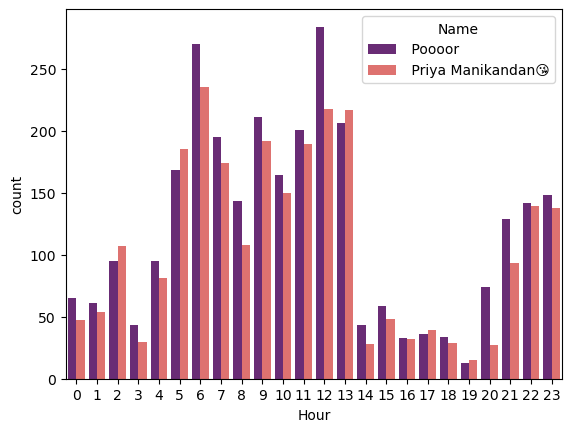

In [100]:
sb.countplot(data=df, x = 'Hour', hue = 'Name', palette = 'magma' )